In [1]:
from components import *
import modular_network
import mnist_loader, fashion_mnist_loader
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sci

c:\Users\stanl\ml_0\src\modular_network.py:175: SyntaxWarning: invalid escape sequence '\p'
  """Return the vector of partial derivatives \partial C_x /


In [2]:
mnist_train, mnist_val, mnist_test = mnist_loader.load_data_wrapper("../data/mnist.pkl.gz")

In [8]:
n_train = len(mnist_train)
reg = L2Regularization(3.125 / n_train)

net = modular_network.Network([
    Flatten((28, 28)),
    FullyConnected(28*28, 30, tanh(), reg),
    FullyConnected(30, 30, tanh(), reg),
    FullyConnected(30, 10, Softmax(), reg)
])

aug = RandUniformAug(-0.2, 0.2)
optim = RMSProp_optimizer(0.005, 20, 0.99)
cost = BinaryCrossEntropyCost()

net.set_cost(cost)
net.set_optimizer(optim)

In [9]:
net.total_cost(mnist_val, convert=True)

3.9272620903826407

In [10]:
net.SGD(mnist_train, 10, 20, mnist_val, data_augmentation = aug,
        monitor_test_acc = False, 
        monitor_training_acc = False, 
        monitor_test_cost = True,
        monitor_training_cost = True)


Epoch 1 training complete, took 3.91731858253479 seconds
Cost on training data: 0.5373081587472794
Cost on test data: 0.4990322248120944
Epoch 2 training complete, took 4.225666046142578 seconds
Cost on training data: 0.39593891634212114
Cost on test data: 0.3704049816125326
Epoch 3 training complete, took 4.725420236587524 seconds
Cost on training data: 0.329431451296019
Cost on test data: 0.3223100057079051
Epoch 4 training complete, took 5.142902374267578 seconds
Cost on training data: 0.2908456991436957
Cost on test data: 0.28307700225240146
Epoch 5 training complete, took 3.836658239364624 seconds
Cost on training data: 0.2849043532573612
Cost on test data: 0.26057523982634173
Epoch 6 training complete, took 3.0221314430236816 seconds
Cost on training data: 0.23363752244983071
Cost on test data: 0.24378220768894598
Epoch 7 training complete, took 3.7658298015594482 seconds
Cost on training data: 0.22426843927673462
Cost on test data: 0.2280706603556259
Epoch 8 training complete, t

In [5]:
net.accuracy(mnist_val)

9627

In [2]:
rms = RMSProp_optimizer(0.01, 20, 0.99).get_optimizer()
input = [np.random.randn(3, 3), np.random.randn(4, 4)]
input

[array([[ 1.15087322,  0.2711855 ,  0.94330052],
        [ 0.7157369 ,  0.99645804,  0.64358079],
        [-1.52420191,  0.03319994, -2.30591487]]),
 array([[-0.1169909 , -1.16578894,  1.57365906, -1.9165633 ],
        [-0.79053042,  0.93550861,  0.74873665, -0.24794584],
        [ 0.32512932,  0.88960256,  1.58809548, -0.27043898],
        [-1.6186538 , -0.87640242, -0.63250046, -0.64393382]])]

In [3]:
rms.fn(input)

[array([[-0.005     , -0.00499998, -0.00499999],
        [-0.00499999, -0.00499999, -0.00499999],
        [ 0.005     , -0.00499985,  0.005     ]]),
 array([[ 0.00499996,  0.005     , -0.005     ,  0.005     ],
        [ 0.00499999, -0.00499999, -0.00499999,  0.00499998],
        [-0.00499998, -0.00499999, -0.005     ,  0.00499998],
        [ 0.005     ,  0.00499999,  0.00499999,  0.00499999]])]

In [22]:
# Flattening tests
f = Flatten((3, 3))
x = np.random.randn(4, 3, 3)
x

array([[[-0.21869192, -0.23254391, -2.27962388],
        [ 0.08344929,  0.78463752, -0.74189054],
        [-0.64628094,  1.3278494 , -0.947856  ]],

       [[ 0.38075061,  0.75688869,  0.09261711],
        [ 0.02464451, -0.25923592, -0.44713224],
        [-0.75302967, -1.68949572,  0.43627887]],

       [[-0.99103836,  0.04714269,  0.45869039],
        [-0.67288642,  2.38686903,  0.78682668],
        [ 0.65850009, -0.75026401, -0.57102234]],

       [[-1.6290546 , -0.18751622,  1.14737057],
        [-0.56355261,  0.57596367,  0.05922633],
        [-0.47149435,  0.41524469, -0.07668399]]])

In [23]:
y = f.feedforward(x)
y

array([[-0.21869192,  0.38075061, -0.99103836, -1.6290546 ],
       [-0.23254391,  0.75688869,  0.04714269, -0.18751622],
       [-2.27962388,  0.09261711,  0.45869039,  1.14737057],
       [ 0.08344929,  0.02464451, -0.67288642, -0.56355261],
       [ 0.78463752, -0.25923592,  2.38686903,  0.57596367],
       [-0.74189054, -0.44713224,  0.78682668,  0.05922633],
       [-0.64628094, -0.75302967,  0.65850009, -0.47149435],
       [ 1.3278494 , -1.68949572, -0.75026401,  0.41524469],
       [-0.947856  ,  0.43627887, -0.57102234, -0.07668399]])

In [24]:
f.backprop(y) == x

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]]])

In [25]:
C, H, W = 2, 5 ,5
h_f, w_f = 2, 2
F = 3
M = 1

In [26]:
def approx_eq(a, b):
    return np.all(np.abs(a - b) < 1e-6)

In [27]:
Hp = H - h_f + 1
Wp = W - w_f + 1

conv = Convolution((C, H, W), (h_f, w_f), F, noActivation())
x = np.random.randn(M, C, H, W)

x_fwd = conv.feedforward(x)
assert x_fwd.shape == (M, F, Hp, Wp)

In [28]:
def test_feedforward(m_test, f_test):
    sum = np.zeros((Hp, Wp))
    for c in range(C):
        img = x[m_test, c] 
        filter = conv.filters[f_test, c] # first filter, channel c
        sum += sci.correlate(img, filter, mode="valid")
    sum += conv.biases[f_test]
    
    assert approx_eq(x_fwd[m_test, f_test], sum)

for m in range(M):
    for f in range(F):
        test_feedforward(m, f)

In [30]:
delta = np.random.randn(M, F, Hp, Wp)
conv.set_optimizer(SGD_optimizer(0, 20).get_optimizer())
conv.set_mode(Mode.TRAIN)
prev_delta = conv.backprop(delta)
assert prev_delta.shape == (M, C, H, W)

In [7]:
import os
os.getcwd()

'c:\\Users\\stanl\\ml_0\\src'

In [7]:
import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper("../data/mnist.pkl.gz")
n_train = len(training_data)

In [ ]:

reg = L2Regularization(3.125 / n_train)
net = modular_network.Network([
    Flatten((28, 28)),
    FullyConnected(28*28, 100, tanh(), reg),
    FullyConnected(100, 100, tanh(), reg),
    FullyConnected(100, 10, Softmax(), reg)
], cost = BinaryCrossEntropyCost())

In [11]:
optim = SGD_momentum_optimizer(0.005, 20, 0.95)
net.set_optimizer(optim)

In [12]:
net.SGD(training_data, 10, 20, test_data, 
        monitor_training_acc=False, 
        monitor_test_acc=True,
        )

Epoch 1 training complete, took 8.810375213623047 seconds
Accuracy on test data: 8499 / 10000
Epoch 2 training complete, took 10.75200080871582 seconds
Accuracy on test data: 8888 / 10000
Epoch 3 training complete, took 11.614086151123047 seconds
Accuracy on test data: 9004 / 10000
Epoch 4 training complete, took 10.764673948287964 seconds
Accuracy on test data: 9083 / 10000
Epoch 5 training complete, took 10.091623544692993 seconds
Accuracy on test data: 9139 / 10000
Epoch 6 training complete, took 10.063230276107788 seconds
Accuracy on test data: 9195 / 10000
Epoch 7 training complete, took 10.265061140060425 seconds
Accuracy on test data: 9228 / 10000
Epoch 8 training complete, took 10.179511308670044 seconds
Accuracy on test data: 9264 / 10000
Epoch 9 training complete, took 10.100712776184082 seconds
Accuracy on test data: 9288 / 10000
Epoch 10 training complete, took 10.1143798828125 seconds
Accuracy on test data: 9325 / 10000


In [2]:
plt.hist(net.layers[1].weights, bins=40, histtype="barstacked")
plt.show()

NameError: name 'net' is not defined

In [3]:
plt.hist(net.layers[2].weights, bins=40, histtype="barstacked")
plt.show()

NameError: name 'net' is not defined

In [ ]:
plt.hist(net.layers[3].weights, bins=20, histtype="barstacked")
plt.show()

NameError: name 'net' is not defined

In [36]:
conv_net = modular_network.Network([
    Convolution((28, 28), (5, 5), 4, clippedReLU(), correct2Dinput = True), # --> (4, 24, 24)
    MaxPool((4, 24, 24)),
    Flatten((4, 12, 12)),
    FullyConnected(4*12*12, 50, tanh(), reg),
    FullyConnected(50, 50, tanh(), reg),
    FullyConnected(50, 10, Softmax(), reg)
], cost = BinaryCrossEntropyCost())

In [38]:
conv_net.set_optimizer(optim)

In [40]:
conv_net.SGD(training_data, 10, 20, test_data, 
        monitor_training_acc=False, 
        monitor_test_acc=True,
        )

Epoch 1 training complete, took 127.47853779792786 seconds
Accuracy on test data: 8244 / 10000
Epoch 2 training complete, took 117.76653528213501 seconds
Accuracy on test data: 8885 / 10000
Epoch 3 training complete, took 114.35406827926636 seconds
Accuracy on test data: 9205 / 10000
Epoch 4 training complete, took 113.9613664150238 seconds
Accuracy on test data: 9298 / 10000
Epoch 5 training complete, took 116.41659283638 seconds
Accuracy on test data: 9408 / 10000
Epoch 6 training complete, took 118.58836197853088 seconds
Accuracy on test data: 9451 / 10000
Epoch 7 training complete, took 116.20689702033997 seconds
Accuracy on test data: 9474 / 10000
Epoch 8 training complete, took 117.52172923088074 seconds
Accuracy on test data: 9509 / 10000
Epoch 9 training complete, took 112.60206413269043 seconds
Accuracy on test data: 9541 / 10000
Epoch 10 training complete, took 115.30504941940308 seconds
Accuracy on test data: 9568 / 10000


In [41]:
conv_net.SGD(training_data, 10, 20, test_data, 
        monitor_training_acc=False, 
        monitor_test_acc=True,
        )

Epoch 1 training complete, took 107.77238893508911 seconds
Accuracy on test data: 9612 / 10000
Epoch 2 training complete, took 109.33832836151123 seconds
Accuracy on test data: 9624 / 10000
Epoch 3 training complete, took 108.12757968902588 seconds
Accuracy on test data: 9631 / 10000
Epoch 4 training complete, took 108.9686119556427 seconds
Accuracy on test data: 9657 / 10000
Epoch 5 training complete, took 112.16818690299988 seconds
Accuracy on test data: 9611 / 10000


KeyboardInterrupt: 

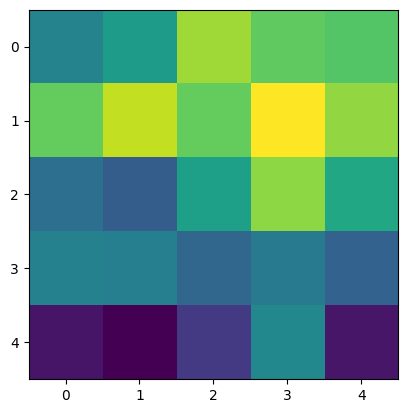

In [56]:
plt.imshow(conv_net.layers[0].filters[0, 0])

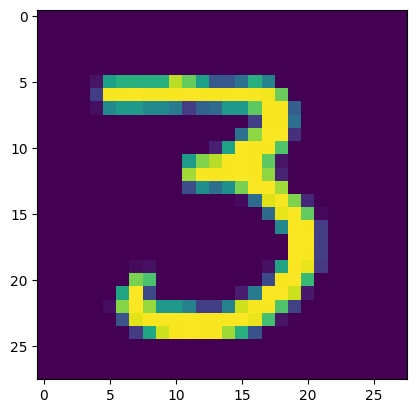

In [70]:
plt.imshow(training_data[4][0])

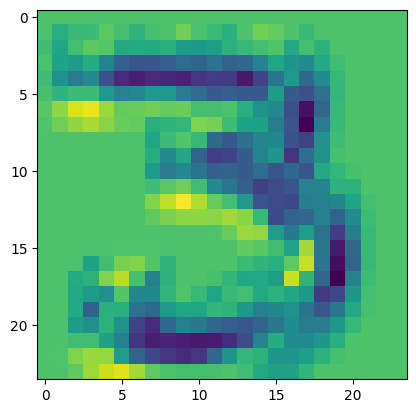

In [98]:
f = 3
conved_img = sci.correlate(training_data[4][0], conv_net.layers[0].filters[f, 0], mode="valid") + conv_net.layers[0].biases[f]
plt.imshow(conved_img)

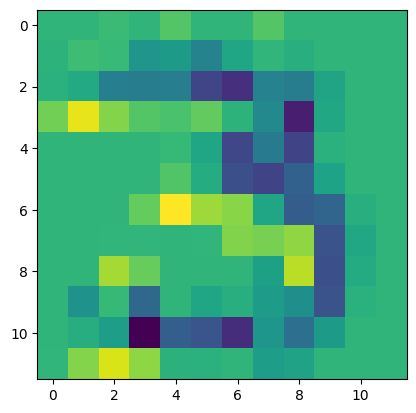

In [96]:
m = MaxPool((1, 24, 24))
pooled_img = m.feedforward(np.array([conved_img]))
plt.imshow(pooled_img[0, 0])

In [94]:
conv_net.layers[0].biases

array([ 0.12599984, -0.00603516, -1.35431575, -2.2749751 ])

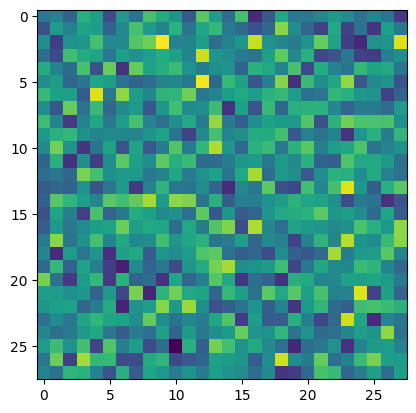

In [134]:
randn_images = np.random.randn(40, 28, 28)
plt.imshow(randn_images[0])

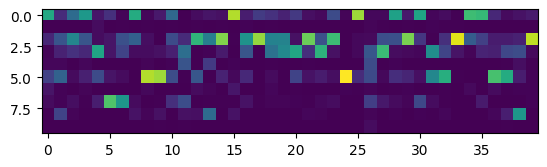

In [ ]:
plt.imshow(conv_net.feedforward(randn_images))

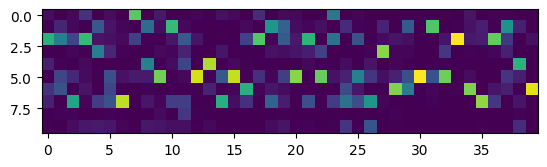

In [136]:
plt.imshow(net.feedforward(randn_images))

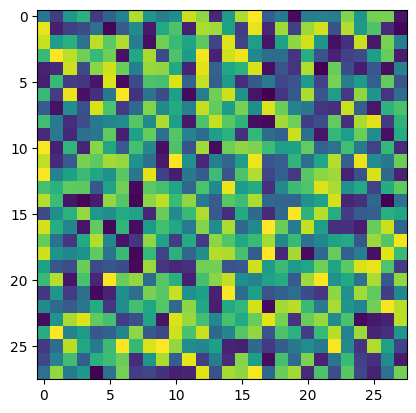

In [139]:
uniform_images = np.random.uniform(0, 1, size=(40, 28, 28))
plt.imshow(uniform_images[0])

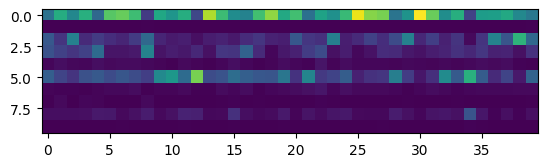

In [140]:
plt.imshow(conv_net.feedforward(uniform_images))

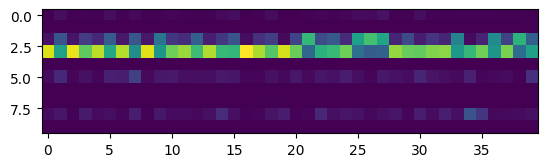

In [141]:
plt.imshow(net.feedforward(uniform_images))

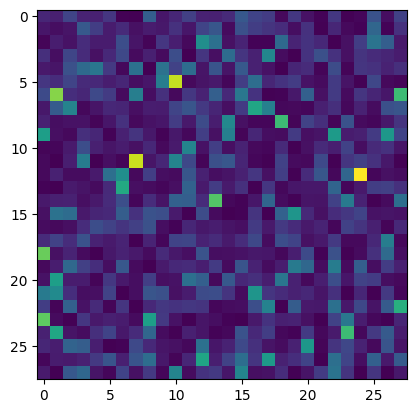

In [142]:
expo_images = np.random.exponential(1, size=(40, 28, 28))
plt.imshow(expo_images[0])

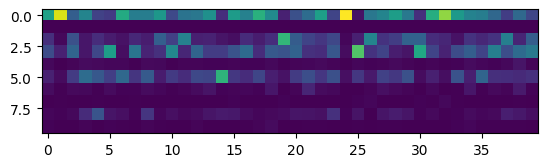

In [143]:
plt.imshow(conv_net.feedforward(expo_images))

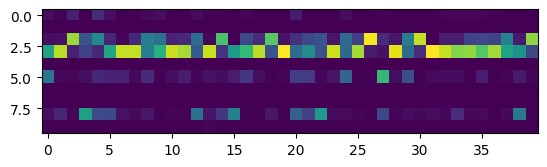

In [144]:
plt.imshow(net.feedforward(expo_images))

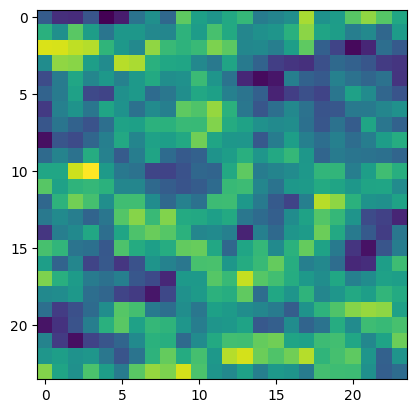

In [145]:
plt.imshow(sci.correlate(uniform_images[0], conv_net.layers[0].filters[0, 0], mode="valid") + conv_net.layers[0].biases[0])

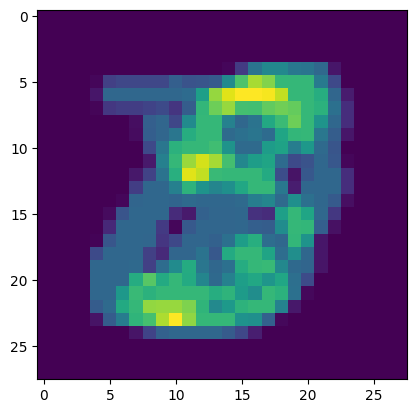

In [198]:
linear_combo = 0.33 * training_data[3][0] + 0.33 * training_data[4][0] + 0.33 * training_data[5][0]
plt.imshow(linear_combo)

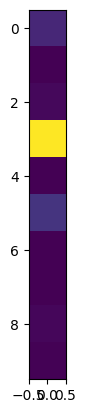

In [199]:
plt.imshow(conv_net.feedforward(np.array([linear_combo])))

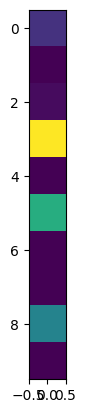

In [200]:
plt.imshow(net.feedforward(np.array([linear_combo])))

In [211]:
training_data[0][1]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [2]:
import fashion_mnist_loader
train_fmnist, val_fmnist, test_fmnist = fashion_mnist_loader.load_data_wrapper("../data")

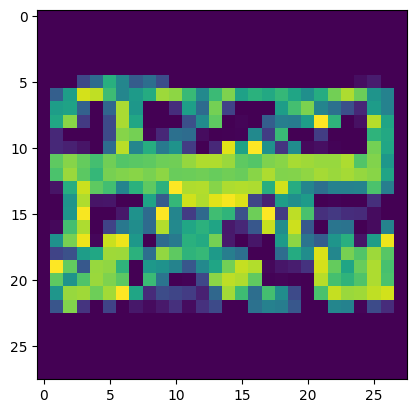

In [3]:
plt.imshow(train_fmnist[0][0])

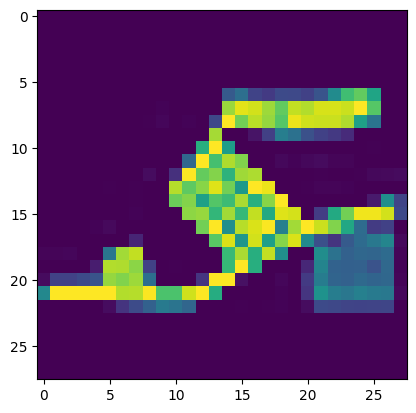

In [4]:
plt.imshow(train_fmnist[10][0])

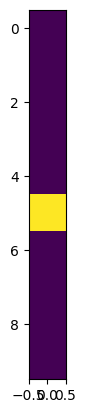

In [5]:
plt.imshow(train_fmnist[10][1])

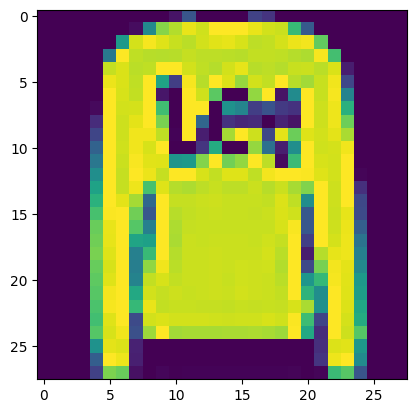

In [6]:
plt.imshow(test_fmnist[1][0])

In [3]:
n_train_fmnist = len(train_fmnist)
reg = L2Regularization(3.125 / n_train_fmnist)

net = modular_network.Network([
    Flatten((28, 28)),
    FullyConnected(28*28, 30, tanh(), reg),
    FullyConnected(30, 30, tanh(), reg),
    FullyConnected(30, 10, Softmax(), reg)
], cost=BinaryCrossEntropyCost())

optim = SGD_momentum_optimizer(0.005, 20, 0.95)

net.set_optimizer(optim)

In [ ]:
net.SGD(train_fmnist, 30, 20, val_fmnist, 
        monitor_test_acc=True)


Epoch 1 training complete, took 1.9937264919281006 seconds
Accuracy on test data: 7132 / 10000
Epoch 2 training complete, took 2.0655417442321777 seconds
Accuracy on test data: 7717 / 10000
Epoch 3 training complete, took 2.1490275859832764 seconds
Accuracy on test data: 7925 / 10000
Epoch 4 training complete, took 2.014514207839966 seconds
Accuracy on test data: 7985 / 10000
Epoch 5 training complete, took 2.403965711593628 seconds
Accuracy on test data: 8208 / 10000
Epoch 6 training complete, took 2.5524024963378906 seconds
Accuracy on test data: 8283 / 10000
Epoch 7 training complete, took 1.8094151020050049 seconds
Accuracy on test data: 8273 / 10000
Epoch 8 training complete, took 1.813664436340332 seconds
Accuracy on test data: 8335 / 10000
Epoch 9 training complete, took 1.9555444717407227 seconds
Accuracy on test data: 8351 / 10000
Epoch 10 training complete, took 2.0068938732147217 seconds
Accuracy on test data: 8455 / 10000
Epoch 11 training complete, took 2.404315710067749 s

In [5]:
net_2 = modular_network.Network([
    Flatten((28, 28)),
    FullyConnected(28*28, 100, tanh(), reg),
    FullyConnected(100, 100, tanh(), reg),
    FullyConnected(100, 10, Softmax(), reg)
], cost=BinaryCrossEntropyCost())

optim = SGD_momentum_optimizer(0.005, 20, 0.95)

net_2.set_optimizer(optim)

In [7]:
net_2.SGD(train_fmnist, 30, 20, val_fmnist, 
        monitor_test_acc=True)

Epoch 1 training complete, took 6.74565577507019 seconds
Accuracy on test data: 7411 / 10000
Epoch 2 training complete, took 6.651242256164551 seconds
Accuracy on test data: 7803 / 10000
Epoch 3 training complete, took 7.284785270690918 seconds
Accuracy on test data: 7933 / 10000
Epoch 4 training complete, took 12.215213298797607 seconds
Accuracy on test data: 8126 / 10000
Epoch 5 training complete, took 16.71707820892334 seconds
Accuracy on test data: 8187 / 10000
Epoch 6 training complete, took 16.007018089294434 seconds
Accuracy on test data: 8192 / 10000
Epoch 7 training complete, took 16.493683099746704 seconds
Accuracy on test data: 8365 / 10000
Epoch 8 training complete, took 6.907848834991455 seconds
Accuracy on test data: 8266 / 10000
Epoch 9 training complete, took 6.267387628555298 seconds
Accuracy on test data: 8451 / 10000
Epoch 10 training complete, took 6.134803295135498 seconds
Accuracy on test data: 8440 / 10000
Epoch 11 training complete, took 6.8045713901519775 secon

In [61]:
conv_net = modular_network.Network([
    Convolution((28, 28), (5, 5), 4, tanh(), correct2Dinput=True),
    MaxPool((4, 24, 24)),
    Flatten((4, 12, 12)),
    FullyConnected(4*12*12, 100, tanh(), reg),
    FullyConnected(100, 100, tanh(), reg),
    FullyConnected(100, 10, Softmax(), reg)
], cost = BinaryCrossEntropyCost())

optim_2 = SGD_momentum_optimizer(0.005, 20, 0.95)
conv_net.set_optimizer(optim_2)

In [62]:
conv_net.SGD(train_fmnist, 30, 20, val_fmnist,
             monitor_test_acc=True)

Epoch 1 training complete, took 137.27189540863037 seconds
Accuracy on test data: 7127 / 10000
Epoch 2 training complete, took 326.8010356426239 seconds
Accuracy on test data: 7590 / 10000
Epoch 3 training complete, took 144.15219378471375 seconds
Accuracy on test data: 7828 / 10000
Epoch 4 training complete, took 296.9900782108307 seconds
Accuracy on test data: 8077 / 10000
Epoch 5 training complete, took 160.51105976104736 seconds
Accuracy on test data: 8237 / 10000
Epoch 6 training complete, took 154.98930859565735 seconds
Accuracy on test data: 8236 / 10000
Epoch 7 training complete, took 780.5496785640717 seconds
Accuracy on test data: 8386 / 10000


KeyboardInterrupt: 